In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train_preprocessed.csv')
test = pd.read_csv('data/test_preprocessed.csv')
kaggle_test = pd.read_csv('data/kaggle_test_preprocessed.csv')

### Regression on tree

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

In [4]:
y_train = train['RoomService']
y_test = test['RoomService']
y_kaggle_test = kaggle_test['RoomService']

In [5]:
X_train = train.drop(['PassengerId', 'Name', 'Transported', 'RoomService'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Transported', 'RoomService'], axis=1)
X_kaggle_test = kaggle_test.drop(['PassengerId', 'Name', 'Transported', 'RoomService'], axis=1)

In [6]:
dtl_model = DecisionTreeRegressor(max_depth=4)

In [7]:
dtl_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [8]:
y_pred_test = dtl_model.predict(X_test)
y_pred_kaggle_test = dtl_model.predict(X_kaggle_test)

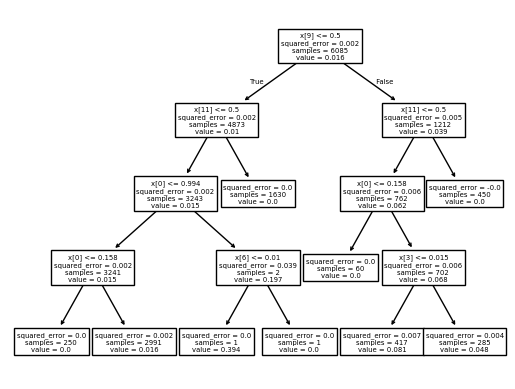

In [9]:
plot_tree(dtl_model)
plt.show()

In [10]:
#print('precision:', precision_score(y_test, y_pred_test))
#print('accuracy:', accuracy_score(y_kaggle_test, y_pred_kaggle_test))
print("Test metrics:\n")
print(mean_squared_error(y_pred_test, y_test))
print(root_mean_squared_error(y_pred_test, y_test))
print(mean_absolute_error(y_pred_test, y_test))
print("\nKaggle test metrics:\n")
print(mean_squared_error(y_pred_kaggle_test, y_kaggle_test))
print(root_mean_squared_error(y_pred_kaggle_test, y_kaggle_test))
print(mean_absolute_error(y_pred_kaggle_test, y_kaggle_test))

Test metrics:

0.0013733414591372878
0.03705862192712092
0.01633351739647905

Kaggle test metrics:

0.0013502968725877156
0.03674638584388559
0.0163077283004194


### Classification on tree

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix

In [12]:
y_train = train['Transported']
y_test = test['Transported']
y_kaggle_test = kaggle_test['Transported']

In [13]:
X_train = train.drop(['PassengerId', 'Name', 'Transported'], axis=1)
X_test = test.drop(['PassengerId', 'Name', 'Transported'], axis=1)
X_kaggle_test = kaggle_test.drop(['PassengerId', 'Name', 'Transported'], axis=1)

In [30]:
dt_model = DecisionTreeClassifier(max_depth=4)

In [31]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [32]:
y_pred_test = dt_model.predict(X_test)

In [33]:
print('precision:', precision_score(y_test, y_pred_test))
print('accuracy:', accuracy_score(y_test, y_pred_test))

precision: 0.7167192429022082
accuracy: 0.7576687116564417


In [34]:
print(classification_report(y_pred_test, y_pred_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1023
        True       1.00      1.00      1.00      1585

    accuracy                           1.00      2608
   macro avg       1.00      1.00      1.00      2608
weighted avg       1.00      1.00      1.00      2608



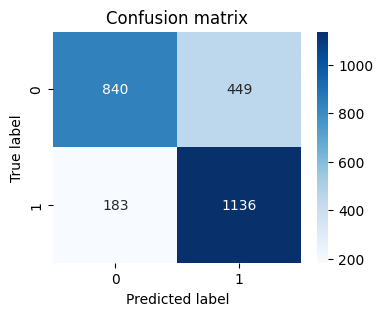

In [35]:
plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')   
plt.show()

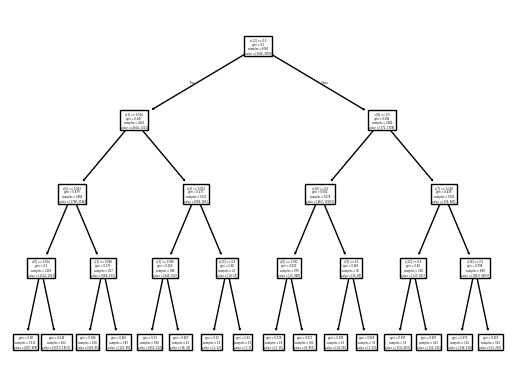

In [36]:
plot_tree(dt_model)
plt.show()